# Metodos de redução de dimensionalidade

Nesse arquivo usarei os métodos de redução de dimensinalidade PCA e tSNE afim de tentar visualizar alguma estrutura nos dados

In [32]:
import nltk
import pymysql
import numpy as np
import machine_learning_utils
import matplotlib.pyplot as plt

from pickle import load
from nltk import FreqDist
from sklearn.svm import SVC
from matplotlib import image
from sklearn.manifold import t_sne
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from database_utils import DatabaseConnector, build_dataframe, normalize_text


In [3]:
db_conector = DatabaseConnector('localhost', 'root', '12345','CORPUS_VIES')
all_data = db_conector.get_data_from_db()

### Vetorizando para o modelo bag-of-words

Sem remoção de stopwords

In [5]:
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(all_data['texts'])
bag_of_words

<1042x6232 sparse matrix of type '<class 'numpy.int64'>'
	with 38253 stored elements in Compressed Sparse Row format>

In [23]:
print("Dimensões da matriz bag-of-words: ", bag_of_words.transpose().shape)

Dimensões da matriz bag-of-words:  (6232, 1042)


### Analise da variância com PCA

(1042, 1042)


<IPython.core.display.Javascript object>


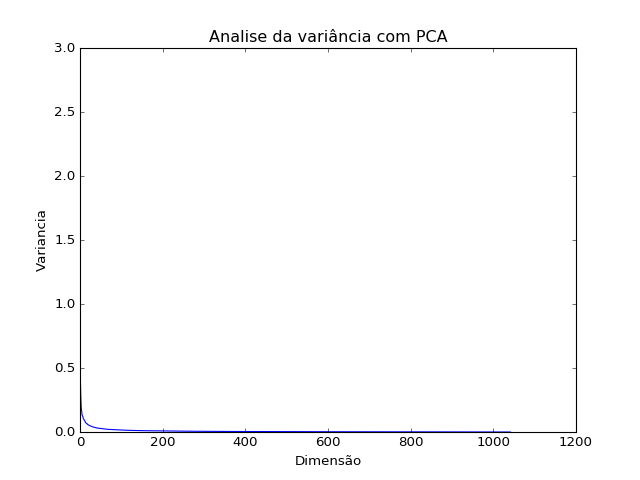

In [28]:
bw_t = bag_of_words.transpose()

pca = PCA()
pca.fit(bw_t.toarray())
pca.explained_variance_ratio_

print(pca.components_.shape)

%matplotlib notebook
plt.figure()
plt.plot(pca.explained_variance_)
plt.title("Analise da variância com PCA")
plt.xlabel("Dimensão")
plt.ylabel("Variancia")

<IPython.core.display.Javascript object>


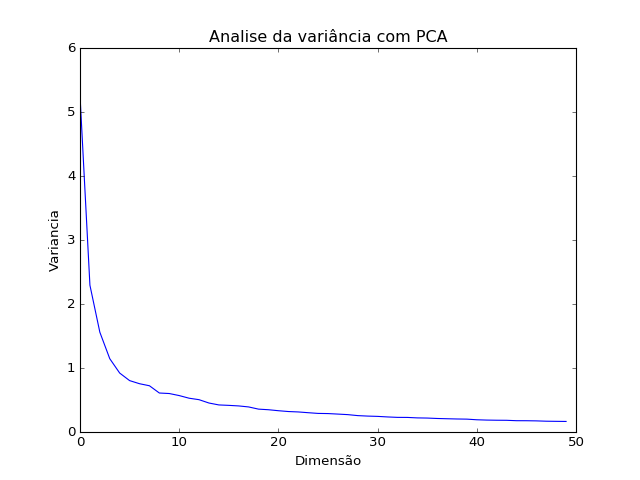

In [26]:
# Reduzindo para 50 dimensoes

pca = PCA(n_components=50)
bw_reduced = pca.fit_transform(bag_of_words.toarray())

%matplotlib notebook
plt.figure()
plt.plot(pca.explained_variance_)
plt.title("Analise da variância com PCA")
plt.xlabel("Dimensão")
plt.ylabel("Variancia")

In [29]:
bw_reduced.shape

(1042, 50)

In [42]:
mnb = MultinomialNB()

def classifica(train_data, test_data):
    X_train, Y_train = train_data
    X_test, Y_test = test_data
    
    classifier = SVC(C=1)
    classifier.fit(X_train, Y_train)
    
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions, normalize=True)
    print("Accuracia: ", accuracy)

sKFold = StratifiedKFold(all_data['labels'], n_folds=10, shuffle=True)

accuracy_list = []
conf_list = []
for train, test in sKFold:
    train_data = (bw_reduced[train], all_data["labels"].iloc[train])
    test_data = (bw_reduced[test], all_data["labels"].iloc[test])
    classifica(train_data, test_data)

Accuracia:  0.509433962264
Accuracia:  0.557692307692
Accuracia:  0.451923076923
Accuracia:  0.461538461538
Accuracia:  0.538461538462
Accuracia:  0.519230769231
Accuracia:  0.576923076923
Accuracia:  0.471153846154
Accuracia:  0.567307692308
Accuracia:  0.490384615385
